# Physics 344: Assignment 1
Answer the following questions in this notebook using Python code, together with appropriate discussions and calculations in Markdown cells. Use numpy's PRNG unless instructed otherwise.

**Student Name:** Ryan Shearer 

**Student Number:** 24695394

## Remarks
It will often be useful for us to estimate the probability density of a random variable using a large set of realizations of that variable, i.e. to construct an empirical estimate of the probability density. A simple way of doing this is to use an appropriately scaled histogram of the data. Suppose we have $N$ data points in total, and consider a particular bin with width $\Delta x$, centered at the point $x$ and containing $n$ of the data points. Then $f=n/N$ is an empirical estimate of the probability that the random variable will take a value in this bin. In turn, $p=n/(N \Delta x)$ is an estimate of the average value of the probability density over the bin. For sufficiently large $N$ and small $\Delta x$, we expect $p$ to be a good approximation for the probability density at the centre of the bin. This scaling for the height of the bars of a histogram (i.e. using $p$ rather than $n$) can be selected using the "density=True" option in **hist**.

In [1]:
# https://numpy.org/doc/stable/reference/random/generator.html
# https://docs.scipy.org/doc/scipy/reference/integrate.html

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy
rng = np.random.default_rng()
import math

### Question 0

If $X\sim N(\mu,\sigma)$, what are the probabilities of $X$ taking a value within $\sigma$, $2\sigma$, and $3\sigma$ of $\mu$, respectively? *These probabilities will return later!*

**Hint:** *It is easy to see that the answer does not actually depend on the values of $\mu$ and $\sigma$, so just make the simplest choice for these parameters.*

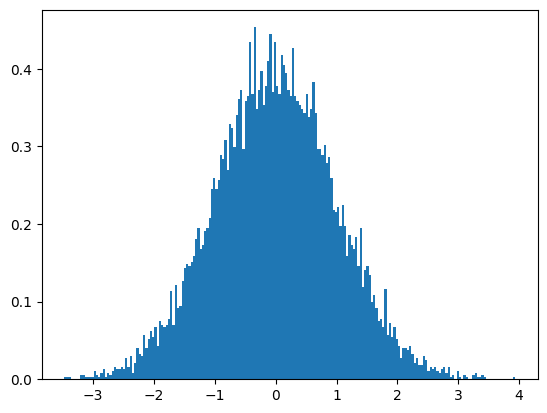

Probability of being in 1 Standard Deviation:  0.688299999999998
Probability of being in 2 Standard Deviation:  0.9542999999999973
Probability of being in 3 Standard Deviation:  0.9973999999999972

Check:
P1 = 0.682689492137086 	 P2 = 0.9544997361036417 	 P3 = 0.9973002039367399


In [2]:
mu, sigma = 0, 1
N = 10000

s = np.random.normal(mu, sigma, N)
def pdf(x):
    return scipy.stats.norm.pdf(x, loc=mu, scale=sigma)


#Note that here count is normalized due to density = True & thus we don't divide by N later
count, bins, ignored = plt.hist(s, 200, density=True)



plt.show()



delta_x = np.diff(bins)[0]

P_sigma = 0
P_2sigma = 0 
P_3sigma = 0
counter = 0



for i in bins:
    if counter == 200:
        break
    if i >= -3 and i <= 3:
        P_3sigma += count[counter] * delta_x

    if i >= -2 and i <= 2:
        P_2sigma += count[counter] * delta_x

    if i >= -1 and i <= 1:
        P_sigma += count[counter] * delta_x
    counter += 1

print("Probability of being in 1 Standard Deviation: ",P_sigma)
print("Probability of being in 2 Standard Deviation: ", P_2sigma)
print("Probability of being in 3 Standard Deviation: ", P_3sigma)

prob1, error = integrate.quad(pdf, mu - sigma, mu + sigma)
prob2, error = integrate.quad(pdf, mu - 2*sigma, mu + 2*sigma)
prob3, error = integrate.quad(pdf, mu - 3*sigma, mu + 3*sigma)

print("\nCheck:\nP1 =",prob1, "\t P2 =", prob2,"\t P3 =",prob3)


### Question 1
Let $X\sim U[-\pi/2,\pi/2]$ and $Y=\sin(X)$. Derive an expression for the probability density function $p_Y(y)$ of $Y$. Check your answer by comparing $p_Y(y)$ to an empirical estimate of the probability density based on a large set of realisations of $Y$.

Using the formula $ P_y(y) = P_x(g^{-1} (y)) \left| \frac{d g^{-1} (y)}{d y} \right|$ , we start by finding the inverse of $g(x) = Y = \sin (X) \rightarrow g^{-1}(y) = \arcsin (y)$ . The derivative of this function with respect to y: $ \frac{d g^{-1}(y)}{dy} = \frac{1}{\sqrt{1-y^{2}}} $. Therefore, $P_y(y) = P_x(\arcsin(y)) \left| \frac{1}{\sqrt{1-y^{2}}} \right|$. But $P_x(x) = \frac{1}{\pi}$ due to the uniform distribution. Leaving us with the expression $P_y(y) = \frac{1}{\pi \sqrt{1-y^2}}$

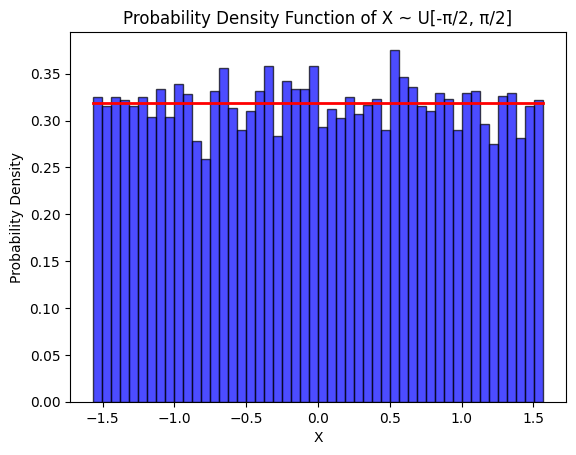

/tmp/ipykernel_31949/679219821.py:26: RuntimeWarning: divide by zero encountered in divide
  return 1 / (np.pi * np.sqrt(1 - y**2))


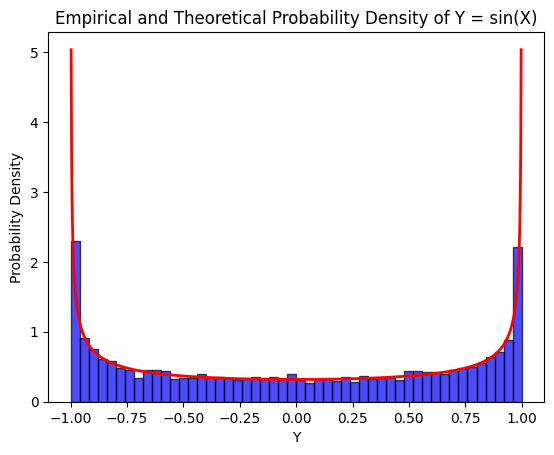

In [3]:

N = 10000
lower_bound = -np.pi / 2
upper_bound = np.pi / 2
X = np.random.uniform(lower_bound, upper_bound, N)

num_bins = 50
plt.hist(X, bins=num_bins, density=True, alpha=0.7, color='blue', edgecolor='black')

# Plot the theoretical uniform density function 1/a-b
x_values = np.linspace(lower_bound, upper_bound, 1000)
y_values = 1 / (upper_bound - lower_bound) * np.ones_like(x_values)
plt.plot(x_values, y_values, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of X ~ U[-π/2, π/2]')


plt.show()


Y = np.sin(X)


def p_Y(y):
    return 1 / (np.pi * np.sqrt(1 - y**2))

num_bins = 50
plt.hist(Y, bins=num_bins, density=True, alpha=0.7, color='blue', edgecolor='black')

# Plot the theoretical PDF p_Y(y)
y_values = np.linspace(-1, 1, 1000)
pdf_values = p_Y(y_values)
plt.plot(y_values, pdf_values, color='red', linewidth=2)


plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title('Empirical and Theoretical Probability Density of Y = sin(X)')

# Show the plot
plt.show()


### Question 2
Write a function that uses the inverse CDF approach to generate random numbers according to the probability density $p(x)=\sin(x)/2$ with $x\in[0,\pi]$. Test your function by performing a comparison as in the previous question.

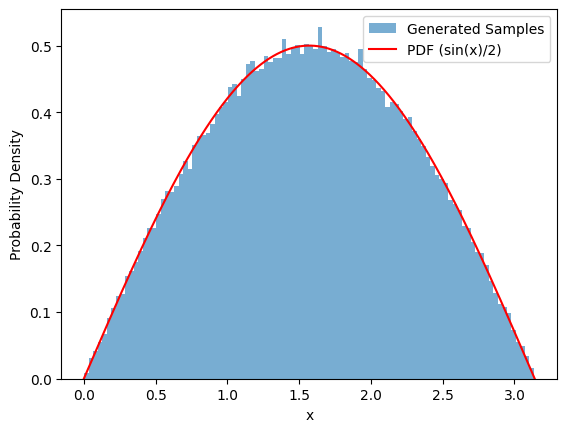

In [4]:

def pdf(x):
    return np.sin(x) / 2


def generate_samples(num_samples):

    
    uniform_samples = np.random.uniform(0,1,num_samples)

    #  inverse CDF to transform the uniform samples into samples from the uniform distribution
    samples = np.arccos(1 - 2 * uniform_samples)

    return samples

num_samples = 100000
custom_samples = generate_samples(num_samples)


plt.hist(custom_samples, bins=100, density=True, alpha=0.6, label='Generated Samples')

# Plot the true PDF
x = np.linspace(0, np.pi, 1000)
plt.plot(x, pdf(x), 'r', label='PDF (sin(x)/2)')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

We see that the generated samples using the inverted CDF method agree with the given PDF.

### Question 3
Use the Box-Muller transformation combined with a linear transformation to generate realisations of a $N(\mu=11,\sigma=2)$ Gaussian random variable. Test your function by performing a comparison as in the previous question.

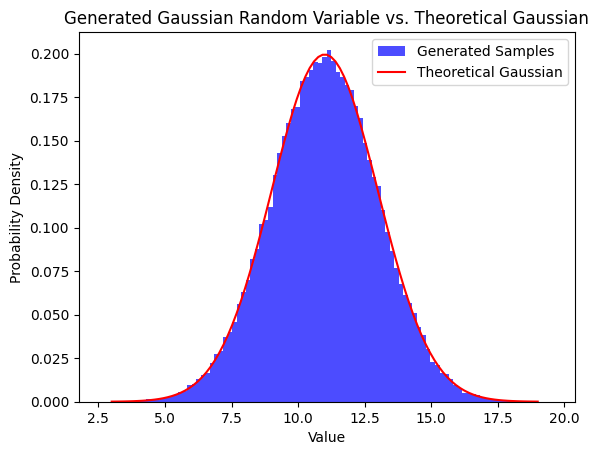

In [5]:
def generate_gaussian(mu, sigma, size):
    
    
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)

    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z0 = r * np.cos(theta)
    z1 = r * np.sin(theta)

    #  Apply linear transformation to obtain Gaussian random variables
    gaussian_rv = mu + sigma * z0

    return gaussian_rv


mu = 11
sigma = 2
size = 100000

# realizations of the Gaussian random variable
samples = generate_gaussian(mu, sigma, size)


plt.hist(samples, bins=100, density=True, alpha=0.7, color='blue', label='Generated Samples')

#  Theoretical Gaussian distribution for comparison
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, pdf, color='red', label='Theoretical Gaussian')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Generated Gaussian Random Variable vs. Theoretical Gaussian')
plt.legend()
plt.show()

### Question 4
Write a function that generates random numbers according to the mixture probability density $p(x)=(1/3)p_1(x)+(2/3)p_2(x)$ with $p_1(x)=U(4,8)$ and $p_2(x)=N(\mu=15,\sigma=4)$. Test your function as before.

**Hint**: *One way to generate these numbers is to first choose randomly between the $p_1$ and $p_2$ distributions, with $p_1$ being chosen with probability $1/3$ and $p_2$ with probability $2/3$. Then simply return a random number generated using the chosen distribution.*

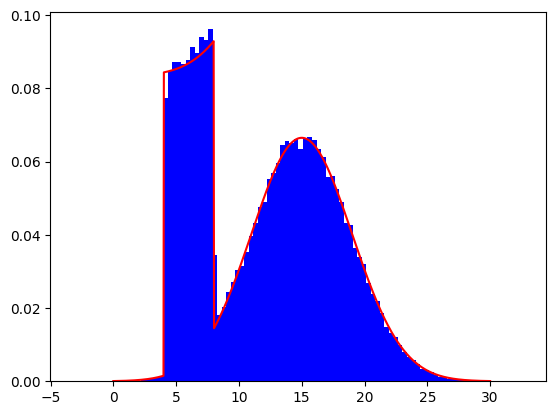

In [6]:
N= 100000
mu = 15
sigma = 4


def mix_random():

    val = []
    for i in range(0,N):

        random_float = rng.random()

        if random_float <= 1/3:

            uniform_samples = np.random.uniform(4,8,1)
            val.append(uniform_samples[0])
        else:
            s = np.random.normal(mu, sigma, 1)
            val.append(s[0])
    
    return val
    

count,bins,ignore = plt.hist(mix_random(), bins=100, density=True, color='blue', label='Generated Samples')


#Theoretical
x= np.linspace(0,30,1000)
pdf_vals = []

for i in x:

    p1 = (2/3)*1 / (4 * np.sqrt(2 * np.pi)) * np.exp(-((i - mu) ** 2) / 32)

    if 4 <= i <= 8:
        pdf = 1 / 12 + 2/3 * p1
    
    else:
        pdf = p1

    pdf_vals.append(pdf)
    
plt.plot(x,pdf_vals,color = 'r')

plt.show()

When the number of samples is made large and the bins are relatively numerous the uniform distribution and and the gaussian distributions become evident.

### Question 5
Let $X=\tanh(Y+1/2)$ where $Y\sim N(0,1)$. Let $M_n=\frac{1}{n}\sum_{i=1}^n X_i$, with $X_i\sim X$ iid, be the sample mean of $X$ for a sample size of $n$. Investigate the distribution of $M_n$ empirically for different $n$ and comment on the result. In particular, whats aspects of the limit theorems we discussed in Section 1 do you see in action here?

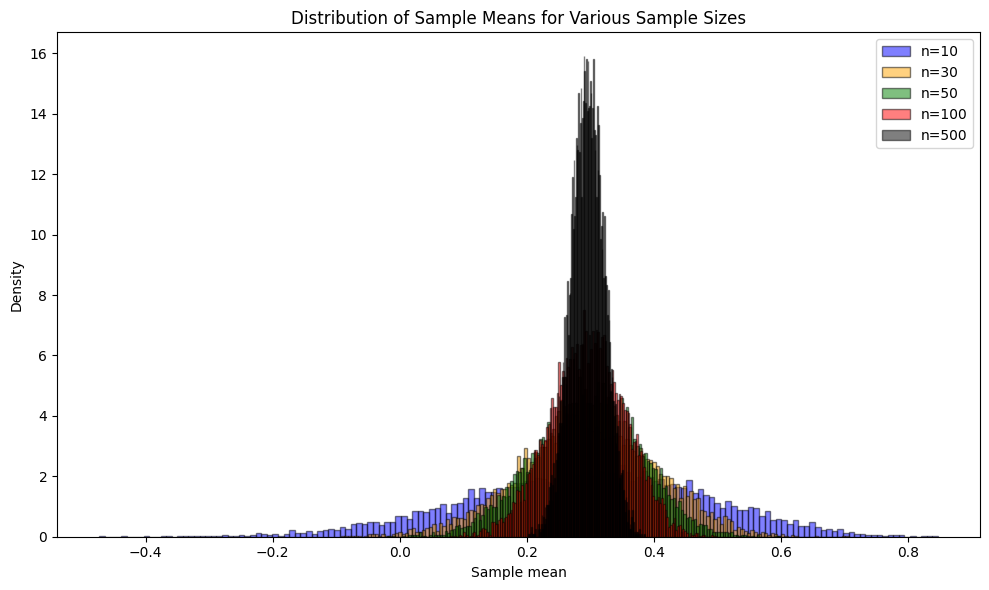

In [7]:
import scipy.stats as stats


def transform(y):
    return np.tanh(y + 0.5)

num_repetitions = 10000

sample_sizes = [10, 30, 50, 100, 500]

colors = ['blue', 'orange', 'green', 'red', 'black']


plt.figure(figsize=(10, 6))

#i = index
#n = value of current index
for i, n in enumerate(sample_sizes):

    
    sample_means = np.empty(num_repetitions)
    
    
    for j in range(num_repetitions):

        
        y = np.random.normal(0, 1, n)

        
        x = transform(y)

       
        sample_means[j] = np.mean(x)
    
    
    
    plt.hist(sample_means, bins=150, density=True, edgecolor='black', color=colors[i], alpha=0.5, label=f'n={n}')




plt.title('Distribution of Sample Means for Various Sample Sizes')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend()


plt.tight_layout()
plt.show()


**Note that in in the figures the scales do change.

As n increases the distribution tends to a narrow normal distribution with mean equal to the expectation value of X and $\sigma (M_n) = \frac{\sigma (x)}{\sqrt{n}}$ , looking at the standard deviation the distribution obviously becomes narrower as n increases. The first of which is predicted by the Central Limit Theorem and the latter by statement the limit theorem given in class concerning the variance of $M_n$. Furthermore we see that the $var(M_n)$ decreases as n increases which is expected  according to the formula $var(M_n) = \frac{1}{n^2} \sum_{i=1}^{n} var(X_i) = \frac{var(X)}{n}$ which was discussed in class. This is all in accordance with the weak law of large numbers which tells us that the probability of Mn converges to $\mu$ in probability as n gets very large.

### Question 6
Repeat the previous question, but now investigate the distribution of the standardized sample mean $Z_n=\frac{M_n-\mu}{\sigma/\sqrt{n}}$ with $\mu={\rm E}(X)$ and $\sigma^2={\rm var}(X)$. Does it compare to $N(0,1)$ in the way you would expect?

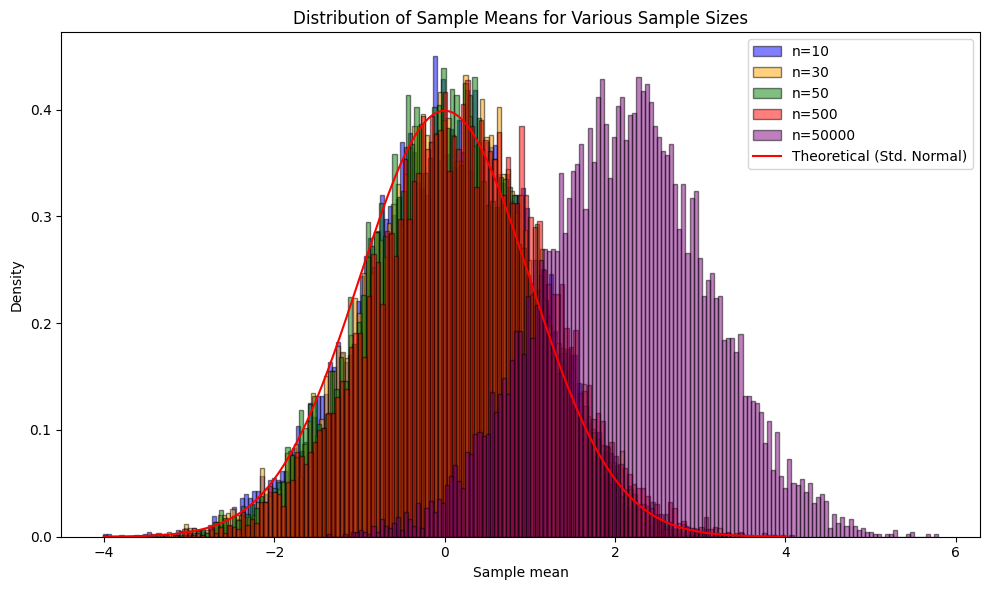

In [8]:

import scipy.stats as stats

def transform(y):
    return np.tanh(y + 0.5)


num_repetitions = 10000



sample_sizes = [10, 30, 50, 500, 50000]

# Estimate mu and sigma^2 of X
y = np.random.normal(0, 1, 10000)
x = transform(y)
mu = np.mean(x)
sigma = np.std(x)

# Colors for each sample size
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a figure
plt.figure(figsize=(10, 6))

# For each sample size
for i, n in enumerate(sample_sizes):

    # Initialize an array to hold the standardized sample means
    standardized_means = np.empty(num_repetitions)
    
    # Repeat the process to create the empirical distribution
    for j in range(num_repetitions):
        
        y = np.random.normal(0, 1, n)
        
        x = transform(y)
        
        # Compute the standardized sample mean
        standardized_means[j] = (np.mean(x) - mu) / (sigma / np.sqrt(n))
    
    
    plt.hist(standardized_means, bins=150, density=True, edgecolor='black', color=colors[i], alpha=0.5, label=f'n={n}')

# Plot the theoretical standard normal distribution
x_values = np.linspace(-4, 4, 400)
y_values = stats.norm.pdf(x_values, 0, 1)
plt.plot(x_values, y_values, 'r-', label="Theoretical (Std. Normal)")

# Enhance plot aesthetics
plt.title('Distribution of Sample Means for Various Sample Sizes')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


We see that as n gets large the distribution $Z_n$ actually does not behave in the manner which the CLT dictates it should i.e. approach a normal distribution. This is due to the tanh transformation which is non-linear, however since the CLT holds for any distribution of X maybe the convergence to a normal distribution is simply slower for some transformations. After much consternation I believe this to be the case here where computation of large enough n (in order to see convergence) could take hours.

**Note that the n = 50 000 distribution can be quite different each time the simulation is run.

### Question 7
Suppose the random point $(X,Y)$ in the plane is distributed uniformly over the unit disk. The joint probability density is then $p(x,y)=\frac{1}{\pi}\mathbf{1}_{x^2+y^2\leq 1}$, with $\mathbf{1}$ being an indicator function. Suppose we want to generate realisations of $(X,Y)$. The simplest option is to just generate random points uniformly over the square $[-1,1]\times[-1,1]$, and to reject (i.e. throw away) points that lie outside the disk. While this works, it is somewhat inefficient since we only use about $\pi/4\approx 79\%$ of the points we generate. A tempting option is to switch to polar coordinates, since then the restriction to the disk is easy to enforce. We therefore write $X=R\cos(\Theta)$ and $Y=R\sin(\Theta)$. The question is how the random variables $R$ and $\Theta$ should be distributed. 
1. A common mistake is to take both $R$ and $\Theta$ to be uniformly distributed. Generate realisations of $(X,Y)$ in this way, and produce a figure that shows that this does not lead to a uniform distribution over the disk.
2. The correct approach is to transform $p(x,y)$ into a probability density for $R$ and $\Theta$. Do so, and determine the probability densities $p(r)$ and $p(\theta)$ for $R$ and $\theta$.
3. Use the inverse CDF approach to express $R$ in terms of a random variable $U \sim U(0,1)$.
4. Now generate points using the correct distributions for $R$ and $\Theta$, and produce a plot showing that this indeed leads to a uniform distribution of points.

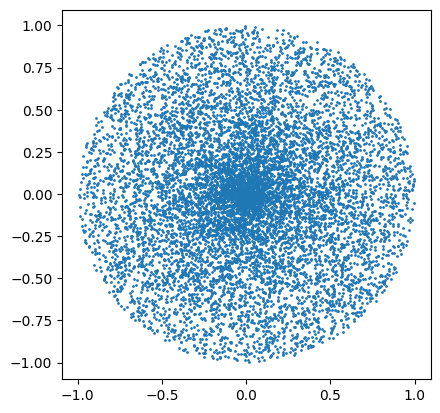

In [9]:
#1)
num_points = 10000


R = np.random.uniform(0, 1, num_points)
Theta = np.random.uniform(0, 2*np.pi, num_points)


X = R * np.cos(Theta)
Y = R * np.sin(Theta)


plt.scatter(X, Y, s=1)
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

2)
To find the joint probability density for $R$ and $\Theta$, we start by considering the area element in both coordinate systems.

In Cartesian coordinates: $dA = dx \, dy$

In Polar coordinates: $dA = r \, dr \, d\theta$

Given the transformation $X = R \cos(\Theta)$ and $Y = R \sin(\Theta)$, the Jacobian $J$ of the transformation is given by:

$ \begin{vmatrix} \frac{\partial X}{\partial r} & \frac{\partial X}{\partial \theta} \\
\frac{\partial Y}{\partial r} & \frac{\partial Y}{\partial \theta} \\
\end{vmatrix} $
This evaluates to $ J = r $.
Now, the joint density in polar coordinates is:
$ p_{R,\Theta}(r, \theta) = p_{X,Y}(x(r,\theta), y(r,\theta)) \times |J| $

Substituting the given values, this becomes:
$ p_{R,\Theta}(r, \theta) = \frac{1}{\pi} \mathbf{1}_{r^2 \leq 1} \times r $

The densities $ p_R $ and $ p_\Theta $ are then derived by marginalizing out the other variable. Since $ \Theta $ should be uniformly distributed over $[-\pi/2, \pi/2]$, its density is straightforward:
$ p(\theta) = \frac{1}{\pi} $.

To get $ p_R(r) $, we integrate $ p_{R,\Theta}(r, \theta) $ with respect to $ \theta $ over $[-π/2, π/2]$:

$ p_R(r) = \int_{-\pi/2}^{\pi/2} p_{R,\Theta}(r, \theta) d\theta $

$ p_R(r) = \frac{r}{\pi} \int_{-\pi/2}^{\pi/2} \mathbf{1}_{r^2 \leq 1} d\theta $

This evaluates to $ p_R(r) = \frac{2r}{\pi} \mathbf{1}_{0 \leq r \leq 1} $


3)

For the inverse CDF approach, we need to find the CDF of $ R $, then invert it.
The CDF is given by:

$ F_R(r) = \int_0^r p_R(u) du $

$ F_R(r) = \int_0^r \frac{2u}{\pi} du $

$ F_R(r) = \frac{r^2}{\pi} $

Setting $ F_R(r) = U $, where $ U \sim U(0,1) $, and solving for $ r $, we get:
$ r = \sqrt{\pi U} $ .
This is the required transformation for $ R $ using the inverse CDF method.


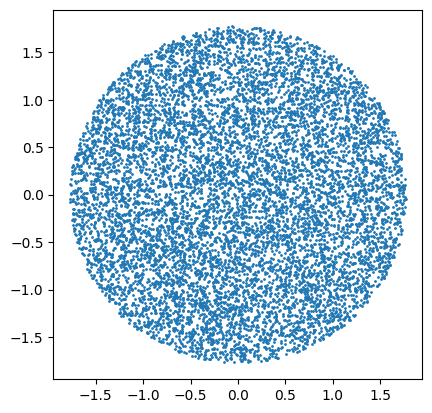

In [10]:
#4)

# Generate R and Theta correctly
R = np.sqrt(np.random.uniform(0, 1, num_points)*np.pi)
Theta = np.random.uniform(0, 2*np.pi, num_points)

X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.scatter(X, Y, s=1)
plt.gca().set_aspect('equal', adjustable='box') # equal scaling
plt.show()


### Question 8
You are carrying a stack of 250 first-year exam papers. The papers are anonymized, with the students' names appearing only on sticky notes attached to the papers. As you enter the Physics library you trip over a fellow student who is sleeping on the floor. This sends the papers flying, detaching all the notes. Your only option is to reattach the notes to the papers at random. Let $X$ be the number of students who will be getting their own exam papers back. Generate realisation of $X$, and compare your empirical distribution to the prediction that $X\sim {\rm Pois}(1)$, with ${\rm Pois}(\lambda)$ the Poisson distribution. https://en.wikipedia.org/wiki/Poisson_distribution

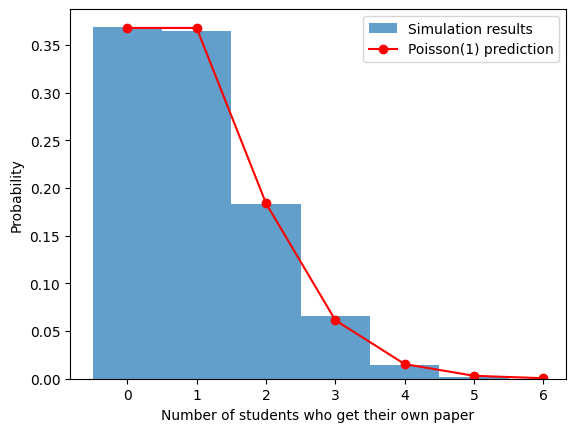

In [11]:
from scipy.stats import poisson


n_students = 250


n_simulations = 10000

# array to store results
matching_results = np.zeros(n_simulations)

for i in range(n_simulations):

    # randomly shuffle papers
    papers = np.random.permutation(n_students)

    #unshuffled
    students = np.arange(n_students)

    # boolean array: if a student gets their own paper
    matches = papers == students

    # count number of students who get their own paper by counting true values in array
    matching_results[i] = np.sum(matches)


x = np.arange(0, np.max(matching_results))
y = poisson.pmf(x, mu=1)


plt.hist(matching_results, bins=x-0.5, density=True, label="Simulation results", alpha=0.7)
plt.plot(x, y, marker="o", linestyle="-", color="r", label="Poisson(1) prediction")
plt.xlabel("Number of students who get their own paper")
plt.ylabel("Probability")
plt.legend()
plt.show()

We see that the possion distribution does an incredible job of predicting this result.